In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'NVDA'
# ticker = 'AAPL'


''' время '''
stime='2000-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,NVDA
Date,
2022-11-01 00:00:00-04:00,169.186707
2022-12-01 00:00:00-05:00,146.139999
2023-01-01 00:00:00-05:00,173.770004


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,NVDA
Date_index,
2000-01-01,0.708629
2000-02-01,1.223669
2000-03-01,1.615327


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,10.782853,3.907051,3.649038,3.258013,8.496795,10.661859,7.982372,10.661859,4.776843,585985930732.800049,595682930732.800049,60.088795,21.772532,64.337498,72.059263,22.019613,22.019613,22.132828,52.478454,65.402166,73.251713,0.016642,0.013877,0.439163,0.397741,0.854286,6.650288,42.54661,0.933962,0.000681,0.040915,0,0.195735,0.151357,-0.107159,-0.036264,-0.831346,0.074459,30.61486,0.251957,0.26006,3.374599,24494000000,19924000000,11254000000,0.439163,3539500000,1492000000,2215500000,63.061975,68.947452,100.733658,5.787957,5.293887,3.623417,0.366451,-0.391026
2021,FY,6.756483,1.755267,2.358995,1.901945,4.68436,6.844814,4.036872,6.844814,3.201783,330866250000,337737250000,76.377251,19.842054,56.830342,70.487058,19.585997,19.585997,20.254108,59.345853,58.01052,71.950841,0.013093,0.014187,0.390576,0.413254,1.207345,4.090446,24.630435,1.343952,0.001194,0.091182,0,0.235322,0.2407,-0.193748,-0.067646,-1.027322,0.083778,16.441586,0.182257,0.198161,0.971536,12130000000,9963000000,4157000000,0.456876,2429000000,1201000000,1826000000,53.168516,69.814461,106.145883,6.864965,5.228143,3.438664,0.256438,-0.45705
2020,FY,4.481938,1.147783,1.954433,1.753695,4.473317,5.009852,4.736043,5.009852,1.106322,159588442448.399994,151335442448.399994,57.077411,14.617003,33.519942,37.356845,13.076732,13.076732,13.861096,44.471185,31.786482,35.424963,0.01752,0.026769,0.209112,0.295178,-2.425213,7.673767,54.730769,1.70279,0.002444,0.139485,0,0.259113,0.038522,-0.10271,-0.044788,-1.283465,0.077304,11.374535,0.183246,0.167948,3.08631,11906000000,11537000000,8579000000,0.216568,2043000000,944000000,1402500000,55.395219,60.422892,86.104819,6.589016,6.040757,4.239019,0.229105,-0.200739


In [11]:
df_key_metr.index[0]

'2022'

In [12]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000']

In [13]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [14]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [15]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [16]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [17]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[173.77000427246094,
 244.63125610351562,
 129.66290283203125,
 58.9035530090332,
 35.67417907714844,
 60.83000564575195,
 26.914749145507812,
 7.151739597320557,
 4.611576557159424,
 3.7046282291412354,
 2.8310587406158447,
 3.3888003826141357,
 5.4881591796875,
 3.5310518741607666,
 1.8240324258804321,
 5.641880512237549,
 4.688185214996338,
 3.438512086868286,
 1.7529065608978271,
 1.701665997505188,
 0.7892669439315796,
 5.027751445770264,
 1.974123477935791]

In [18]:
df_key_metr[ticker] = list(stock_year_prices)

In [19]:
df_key_metr.drop('period', axis=1, inplace=True)

In [20]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,NVDA
2002,0.798375,0.103143,0.093747,-0.000157,0.461138,0.445397,0.398176,0.445397,0.178392,7861893486.559219,7834893486.559219,44.436557,5.740825,48.890548,-29226.369839,10.290437,10.290437,5.721109,26.447255,48.722644,-29125.998091,0.022504,-0.000034,0.400524,0.491683,-0.09114,2.849885,None,0.908899,None,0,0,0.112394,0.053892,-1.001673,-0.117618,-3.703129,0,1.016683,0.225918,0.124419,0.156968,801000000,683000000,495000000,0.400524,1288000000,707500000,1020000000,39.179362,91.868935,91.868935,9.316129,3.973051,3.973051,0.231576,-0.093904,0.789267
2001,0.467966,0.063606,0.043221,0.020099,0.428974,0.259039,0.243764,0.259039,0.190938,3269221438.124516,2895221438.124516,32.712823,4.446323,48.14121,103.521895,8.032485,8.032485,3.937662,17.783915,42.63384,91.678956,0.030569,0.00966,0.737101,0.599803,-2.297297,3.012945,None,0.679518,None,0,0,0.11756,0.023599,-0.534966,-0.049409,-2.294077,0,0.608868,0.184027,0.100641,0.119495,622000000,383000000,321000000,0.737101,1267000000,636500000,958000000,52.124135,59.154283,73.942854,7.002514,6.170306,4.936244,0.245545,-0.023122,5.027751
2000,0.262248,0.02668,0.011134,0.003011,0.043416,0.087533,0.086833,0.087533,0.0007,1904047499.988006,1843047499.988006,49.975,5.084239,119.751415,442.801744,15.23238,15.23238,4.921355,27.967337,115.914937,428.615698,0.02001,0.002258,0.008,0.386139,-0.925645,2.276316,None,0.417323,None,0,0,0.126569,0,-0.72956,-0.030975,-1.195876,0,0.229229,0.431746,0.188614,0.037289,97000000,None,95000000,0.008,1248000000,633000000,932000000,65.300401,105.024347,61.398849,5.589552,3.475385,5.944737,0.3048,-0.008123,1.974123


In [21]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [22]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

In [23]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])
df_with_changes.head(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,NVDA,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % NVDA
2000,0.262248,0.02668,0.011134,0.003011,0.043416,0.087533,0.086833,0.087533,0.0007,1904047499.988006,1843047499.988006,49.975,5.084239,119.751415,442.801744,15.23238,15.23238,4.921355,27.967337,115.914937,428.615698,0.02001,0.002258,0.008,0.386139,-0.925645,2.276316,None,0.417323,None,0,0,0.126569,0,-0.72956,-0.030975,-1.195876,0,0.229229,0.431746,0.188614,0.037289,97000000,None,95000000,0.008,1248000000,633000000,932000000,65.300401,105.024347,61.398849,5.589552,3.475385,5.944737,0.3048,-0.008123,1.974123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001,0.467966,0.063606,0.043221,0.020099,0.428974,0.259039,0.243764,0.259039,0.190938,3269221438.124516,2895221438.124516,32.712823,4.446323,48.14121,103.521895,8.032485,8.032485,3.937662,17.783915,42.63384,91.678956,0.030569,0.00966,0.737101,0.599803,-2.297297,3.012945,None,0.679518,None,0,0,0.11756,0.023599,-0.534966,-0.049409,-2.294077,0,0.608868,0.184027,0.100641,0.119495,622000000,383000000,321000000,0.737101,1267000000,636500000,958000000,52.124135

Current tests

In [24]:
df_some_columns = df_with_changes[[f'change % {ticker}', 'change % debtToAssets']]
df_some_columns.head(3)

,change % NVDA,change % debtToAssets
2000,0.000000,0.000000
2001,154.682724,55.333686
2002,-84.301791,-18.025915


In [25]:
st.mean(df_some_columns[f'change % {ticker}'].to_list()[1:])

49.31033385962536

Vizualization

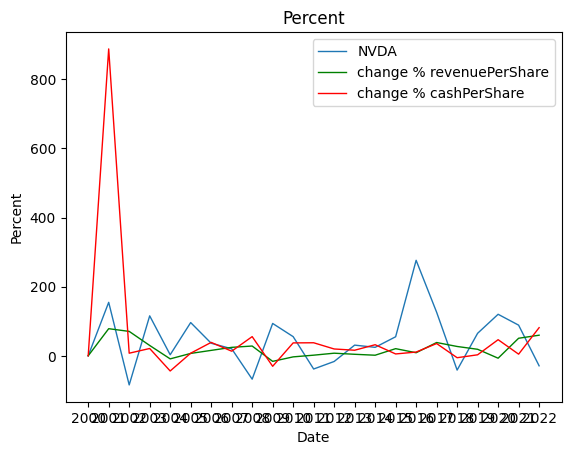

In [26]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [27]:
	# change % netDebtToEBITDA	change % currentRatio

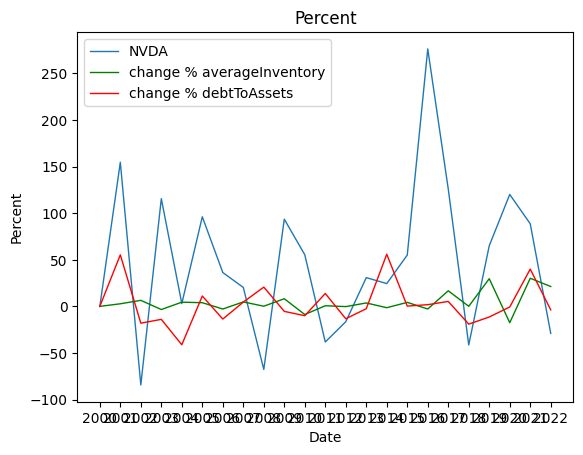

In [28]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

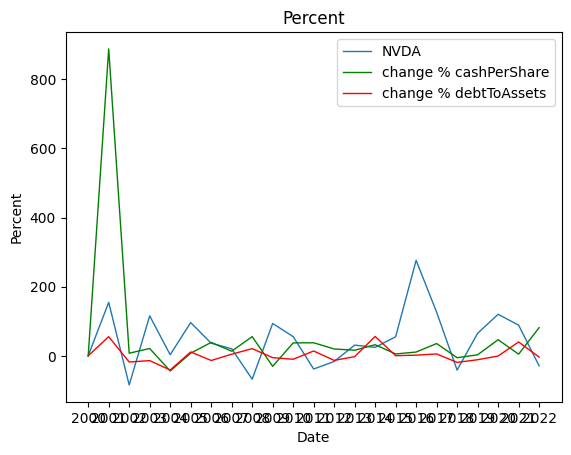

In [29]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()